triển khai MLP

In [8]:
import torch
from torch import nn, optim


In [10]:

class MLP(nn.Module):
    def __init__(self, num_inputs, num_hiddens, num_outputs):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(num_inputs, num_hiddens),
            nn.ReLU(),
            nn.Linear(num_hiddens, num_outputs)
        )

    def forward(self, X):
        return self.net(X)


In [3]:
import torchvision
from torchvision import transforms

trans = torchvision.transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])

data_train = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=trans,
    download=True)
data_val = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=trans,
    download=True
)

len(data_train), len(data_val)

100%|██████████| 9.91M/9.91M [00:00<00:00, 140MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 31.8MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 61.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.17MB/s]


(60000, 10000)

In [4]:
from torch.utils.data import DataLoader

train_loader = DataLoader(
    data_train,
    batch_size=64,
    shuffle=True
)

val_loader = DataLoader(
    data_val,
    batch_size=64,
    shuffle=False
)

In [7]:
print(train_loader.dataset[0][0].shape)  # image
print(train_loader.dataset[0][1])        # label

torch.Size([1, 32, 32])
5


In [19]:
model = MLP(num_inputs=1024, num_hiddens=256, num_outputs=10)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(params=model.parameters(), lr=0.1, weight_decay=1e-4)

epochs = 20

loss_histoty = {"train": [], "val": []}

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        y_hat = model(X_batch)

        loss = criterion(y_hat, y_batch)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        train_loss += loss.item()
    train_loss_avg = train_loss / len(train_loader)
    loss_histoty["train"].append(train_loss_avg)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_hat = model(X_batch)
            loss = criterion(y_hat, y_batch)
            val_loss += loss.item()
        
        val_loss_avg = val_loss / len(val_loader)
        loss_histoty["val"].append(val_loss_avg)
    print(f"Epoch {epoch+1}/{epochs}: Train Loss: {train_loss_avg}, Val Loss: {val_loss_avg}")



Epoch 1/20: Train Loss: 0.42029369825016716, Val Loss: 0.23864361621842833
Epoch 2/20: Train Loss: 0.21018585439985876, Val Loss: 0.17786707589402795
Epoch 3/20: Train Loss: 0.15579842651949954, Val Loss: 0.1301390474416007
Epoch 4/20: Train Loss: 0.1244816089471949, Val Loss: 0.11394344810040513
Epoch 5/20: Train Loss: 0.10431773844820413, Val Loss: 0.10329991544946839
Epoch 6/20: Train Loss: 0.09078898119019356, Val Loss: 0.09270274504176845
Epoch 7/20: Train Loss: 0.0802184719967642, Val Loss: 0.0840995644962943
Epoch 8/20: Train Loss: 0.07148031036911616, Val Loss: 0.08704184003212863
Epoch 9/20: Train Loss: 0.06486918451065925, Val Loss: 0.07938906960085533
Epoch 10/20: Train Loss: 0.05896311326633527, Val Loss: 0.08249693316004127
Epoch 11/20: Train Loss: 0.05409344988239647, Val Loss: 0.0752756723846386
Epoch 12/20: Train Loss: 0.05028875435574421, Val Loss: 0.0695607022229941
Epoch 13/20: Train Loss: 0.0464430904990908, Val Loss: 0.06452496789316468
Epoch 14/20: Train Loss: 0.0

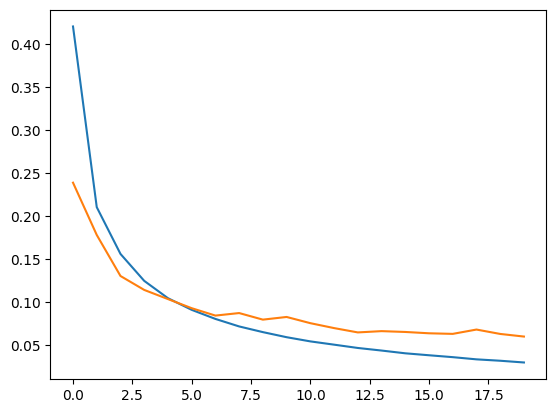

In [22]:
from matplotlib import pyplot as plt

plt.plot(loss_histoty["train"], label="train_loss")
plt.plot(loss_histoty["val"], label = "val_loss")

plt.show()

In [21]:
from sklearn.metrics import classification_report

# Tính toán predictions trên tất cả validation data
y_true = []
y_pred = []

with torch.no_grad():
    for X_batch, y_batch in val_loader:
        
        y_hat = model.forward(X_batch)
        predictions = y_hat.argmax(dim=1)
        
        y_true.extend(y_batch)
        y_pred.extend(predictions)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

